In [1]:
!pip install pydrive

import zipfile
import io
import cv2
import glob
import pandas as pd
import numpy as np
import os
import csv
import random
import math
import matplotlib.pyplot as plt
from google.colab import drive
from numpy.linalg import inv
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

drive.mount('/content/gdrive')



     |████████████████████████████████| 993kB 9.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pydrive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# DOWNLOAD ZIP FILE
fid = drive.ListFile({'q':"title='final_images.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('final_images.zip')
print("Downloaded")
# UNZIP ZIP FILE
zip_ref = zipfile.ZipFile('final_images.zip', 'r')
zip_ref.extractall('/content/gdrive/My Drive/CS464Project/img_all')
zip_ref.close()
print("Unzipped")
images = [cv2.imread(files_img) for files_img in sorted(glob.glob('/content/gdrive/My Drive/CS464Project/img_all/erkul_images/*.jpg'),key=str.lower)]
images=np.asarray(images)

Downloaded
Unzipped


In [0]:
umut_labels = pd.read_csv('/content/gdrive/My Drive/CS464Project/final_labels.csv', header=None, sep=',')

In [4]:
print(images.shape)
print(umut_labels.shape)
print(umut_labels)

(20632, 120, 320, 3)
(2, 20632)
      0         1         2         3         4         5         6      \
0  0.000000  1.000000  2.000000  3.000000  4.000000  5.000000  6.000000   
1  0.003491  0.003491  0.001745 -0.003491 -0.010472 -0.012217 -0.015708   

      7         8         9      ...        20622        20623        20624  \
0  7.000000  8.000000  9.000000  ...  4472.000000  4473.000000  4474.000000   
1 -0.015708 -0.027925 -0.019199  ...     0.001745    -0.010472    -0.020944   

         20625        20626        20627        20628        20629  \
0  4475.000000  4476.000000  4477.000000  4478.000000  4479.000000   
1    -0.020944    -0.020944    -0.020944    -0.019199    -0.017453   

         20630        20631  
0  4480.000000  4481.000000  
1    -0.015708    -0.013963  

[2 rows x 20632 columns]


In [5]:
'''for i in range(images.shape[0]):
  images[i] = cv2.normalize(images[i],None, alpha=-1,beta=1,norm_type=cv2.NORM_MINMAX,dtype = cv2.CV_32F)'''

'for i in range(images.shape[0]):\n  images[i] = cv2.normalize(images[i],None, alpha=-1,beta=1,norm_type=cv2.NORM_MINMAX,dtype = cv2.CV_32F)'

In [5]:
index = np.random.permutation(20632)
images = images[index];
train_img = images[4000:]
test_img = images[0:4000]
print(train_img.shape)
print(test_img.shape)

(16632, 120, 320, 3)
(4000, 120, 320, 3)


In [6]:
all_labels = (np.asarray(umut_labels))[1,:]
all_labels = all_labels[index]
train_labels = all_labels[4000:]
test_labels = all_labels[:4000]

print(umut_labels.values)

[[ 0.0000e+00  1.0000e+00  2.0000e+00 ...  4.4790e+03  4.4800e+03
   4.4810e+03]
 [ 3.4907e-03  3.4907e-03  1.7453e-03 ... -1.7453e-02 -1.5708e-02
  -1.3963e-02]]


In [0]:
'''index = np.random.permutation()
images = images[index,:,:,:]
train_img = []
for i in range(1000):
  a = images[i,240:,:,:]
  a = (cv2.resize(images[i],(320,120)))
  a = cv2.normalize(a,None, alpha=-1,beta=1,norm_type=cv2.NORM_MINMAX,dtype = cv2.CV_32F)
  train_img.append(a)
  
test_img = []
for i in range(1000,1200):
  a = images[i,240:,:,:]
  a = (cv2.resize(images[i],(320,120)))  
  a = cv2.normalize(a,None, alpha=-1,beta=1,norm_type=cv2.NORM_MINMAX,dtype = cv2.CV_32F)
  test_img.append(a)'''

(16632, 120, 320, 3) (4000, 120, 320, 3)


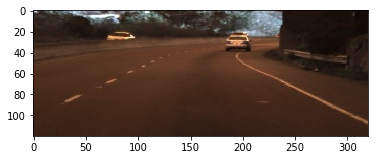

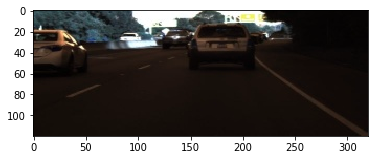

In [7]:
print(np.shape(train_img),np.shape(test_img))
plt.imshow(train_img[300])
plt.show()
plt.imshow(images[300])
plt.show()

In [9]:
from keras.models import Sequential
from keras import layers

cnn_model = Sequential()
cnn_model.add(layers.Conv2D(filters=12,kernel_size=5,strides=2,input_shape=(120,320,3),activation='relu'))
cnn_model.add(layers.Conv2D(filters=24,kernel_size=5,strides=2,activation='relu'))
cnn_model.add(layers.Conv2D(filters=36,kernel_size=5,strides=2,activation='relu'))
cnn_model.add(layers.Conv2D(filters=48,kernel_size=3,strides=2,activation='relu'))
cnn_model.add(layers.Dropout(rate=0.25))
cnn_model.add(layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn_model.add(layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(600,activation='relu'))
cnn_model.add(layers.Dense(400,activation='relu'))
cnn_model.add(layers.Dense(100,activation='relu'))
cnn_model.add(layers.Dense(10,activation='relu'))
cnn_model.add(layers.Dense(1,activation='linear'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 58, 158, 12)       912       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 77, 24)        7224      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 37, 36)        21636     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 18, 48)         15600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 18, 48)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 16, 64)         27712     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 14, 64)         36928     
__________

In [0]:
'''train_labels = np.asarray(umut_labels)
train_labels = train_labels[0,index]
test_labels = train_labels[1000:1200]
train_labels = train_labels[:1000]
print(train_labels)
print(train_labels.shape)'''

In [0]:
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
cnn_model.fit(x=np.asarray(train_img), y=train_labels,epochs=32,validation_split = 0.2)

Instructions for updating:
Use tf.cast instead.
Train on 13305 samples, validate on 3327 samples
Epoch 1/32
13305/13305 [==============================] - 13s 975us/step - loss: 0.1041 - val_loss: 0.0691
Epoch 2/32
13305/13305 [==============================] - 8s 572us/step - loss: 0.0657 - val_loss: 0.0612
Epoch 3/32
13305/13305 [==============================] - 7s 556us/step - loss: 0.0623 - val_loss: 0.0687
Epoch 4/32
13305/13305 [==============================] - 7s 554us/step - loss: 0.0579 - val_loss: 0.0560
Epoch 5/32
13305/13305 [==============================] - 7s 546us/step - loss: 0.0527 - val_loss: 0.0597
Epoch 6/32
13305/13305 [==============================] - 7s 562us/step - loss: 0.0471 - val_loss: 0.0509
Epoch 7/32
13305/13305 [==============================] - 7s 549us/step - loss: 0.0418 - val_loss: 0.0474
Epoch 8/32
13305/13305 [==============================] - 7s 552us/step - loss: 0.0373 - val_loss: 0.0439
Epoch 9/32
13305/13305 [==============================

In [0]:
alfa = cnn_model.predict(np.asarray(test_img))

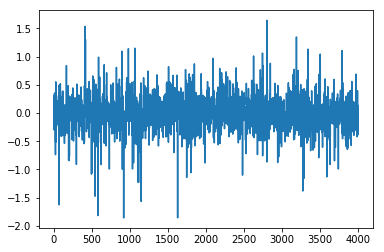

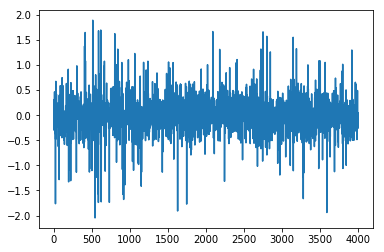

In [14]:
plt.plot(alfa)
plt.show()
plt.plot(test_labels)
plt.show()

In [15]:
import scipy.stats as stat
mert = np.transpose(alfa)
r = stat.pearsonr(test_labels,mert[0])
print(r[0]**2)

0.7854901198482741


In [16]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
  
rms = rmse(mert[0],test_labels)
print(rms)

0.13191855275511974


In [0]:
del cnn_model